In [2]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
from datetime import datetime

### 1.初始数据

In [7]:
df = pd.read_csv(r'C:\Users\xiaozhang\Desktop\kelu.csv')
df['time'] = pd.to_datetime(df['time'])
df
# 基本信息：门票价格110，数据来自于2016~2019年，8k+数据量

,author,rating,time,year,amount,frequency
0,YOUNG,60,2019-02-28,2019,110,1
1,SHING YAN,100,2019-02-28,2019,110,1
2,Sha,60,2019-02-28,2019,110,1
3,Mary Mae,100,2019-02-28,2019,110,1
4,Maria Cristina,100,2019-02-28,2019,110,1
...,...,...,...,...,...,...
8752,Jonathan,100,2016-08-06,2016,110,1
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1
8754,Halley,100,2016-08-05,2016,110,1
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1


In [8]:
df.describe()
# 根据平均分92和1/2分位得知，大多数用户评分在100，效果非常不错
#16~19年门票价格都是110

,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


### 2.分析数据

a1.每天销量分析

<AxesSubplot:xlabel='time'>

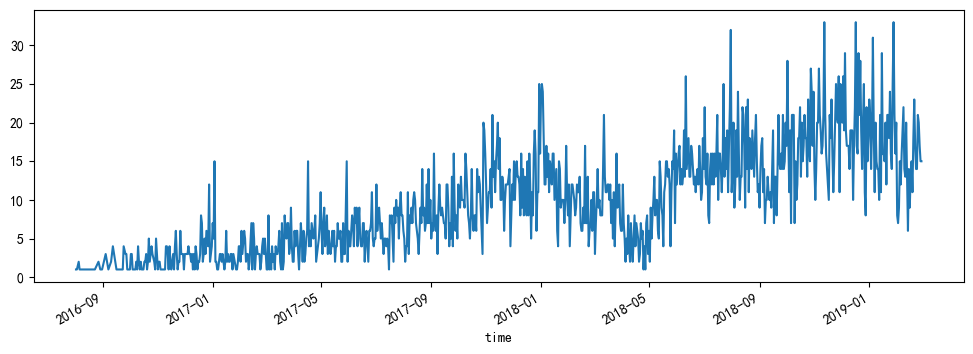

In [18]:
df
df.groupby(by='time')['rating'].count().plot(figsize=(12,4))
#整体来看，每日销量呈现上升趋势，但是在18年5月前后（2，3，4）出现一次较大波动，销量急剧下滑，猜测：台风，疫情，运营推广不利
# 16年9月~17年1月，销量非常低，每天平均2-3张门票，猜测：101观景台门票刚刚上线发售，刚刚对游客开放

a2.每月销量分析

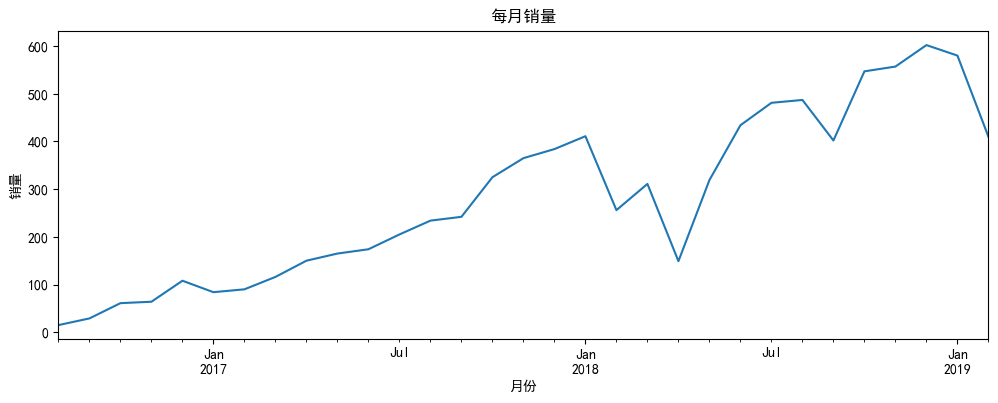

In [17]:
df['month'] = df['time'].values.astype('datetime64[M]')
df.groupby(by='month')['rating'].count().plot(figsize=(12,4))
plt.xlabel('月份')
plt.ylabel('销量')
plt.title('每月销量')
plt.show()
#月份整体销量依然呈现上升趋势，但是在18年2，3，4月份月销量下降明显。原因跟日销量相同

a3.每个用户的购买量和消费金额分析

author      青慧
amount    1980
dtype: object

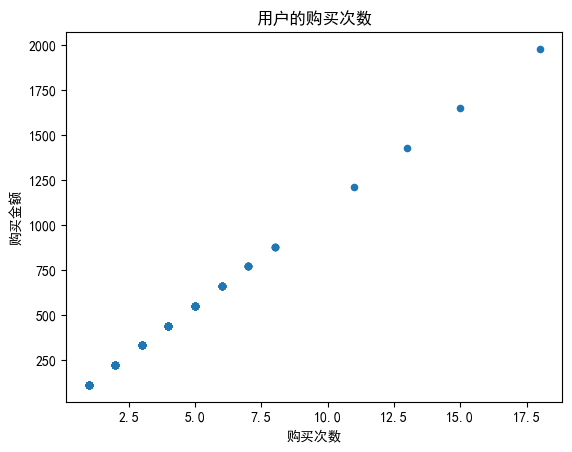

In [30]:
# merge用法: 相当于SQL语句中的join:
#按照游客分组统计游客购买次数
grouped_count_author = df.groupby('author')['frequency'].count().reset_index()
#统计每个游客的购买金额
grouped_count_amount = df.groupby('author')['amount'].sum().reset_index()
#grouped_count_amount.merge(grouped_count_author)
user_purchase_retention = pd.merge(left = grouped_count_author,right=grouped_count_amount,on = 'author',how = 'inner')
user_purchase_retention.plot.scatter(x = 'frequency',y = 'amount')
plt.title('用户的购买次数')
plt.xlabel('购买次数')
plt.ylabel('购买金额')
#斜率就是门票价格110，用户的消费金额和消费次数呈现线性区分